# TERRA-REF Image Stitching

In [9]:
import glob
import getpass
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
from IPython.display import display
%matplotlib inline

## Display first 10 scanned images from RGB stereo camera

Note that source images are georeferenced GeoTIFFs, JPEGs are used here for illustration only.  Images are displayed in timestamp order, but scan is from south-east corner of field.

In [12]:
images = []
files = []
for img_path in sorted(glob.glob('small/2017-05-29/*/*_left.jpg')):
    files.append(img_path)
    images.append(mpimg.imread(img_path))

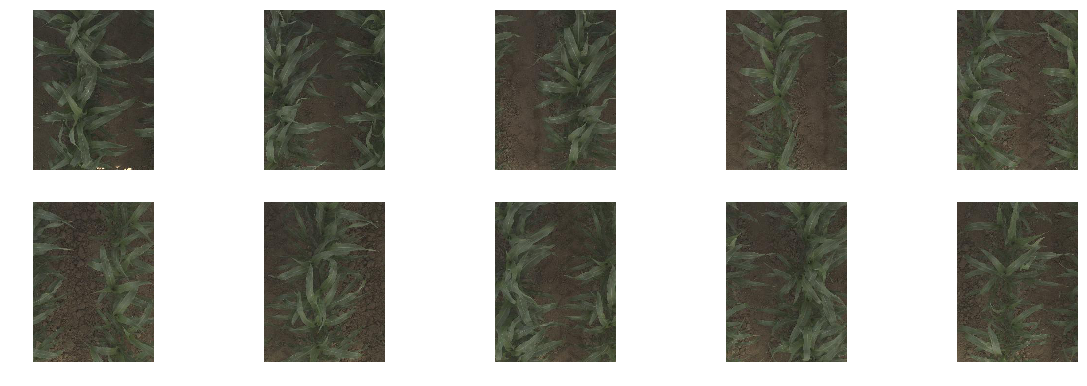

In [13]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.axis("off")
    plt.imshow(image)

## Use GDAL to build VRT then translate to merged GeoTIFF

In [6]:
! gdalbuildvrt  -srcnodata "-99 -99 -99" -overwrite -input_file_list input_list_small_head.txt output_small_head.vrt

0...10...20...30...40...50...60...70...80...90...100 - done.


In [7]:
! gdal_translate --config GDAL_CACHEMAX 999 output_small_head.vrt small_head.tif

Input file size is 14512, 3314
0...10...20...30...40...50...60...70...80...90...100 - done.


## Convert to JPEG for display in Jupyter

In [8]:
! gdal_translate -outsize 50% 50% -of JPEG small_head.tif small_head.jpg

Input file size is 14512, 3314
0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
### Display the final stitched image

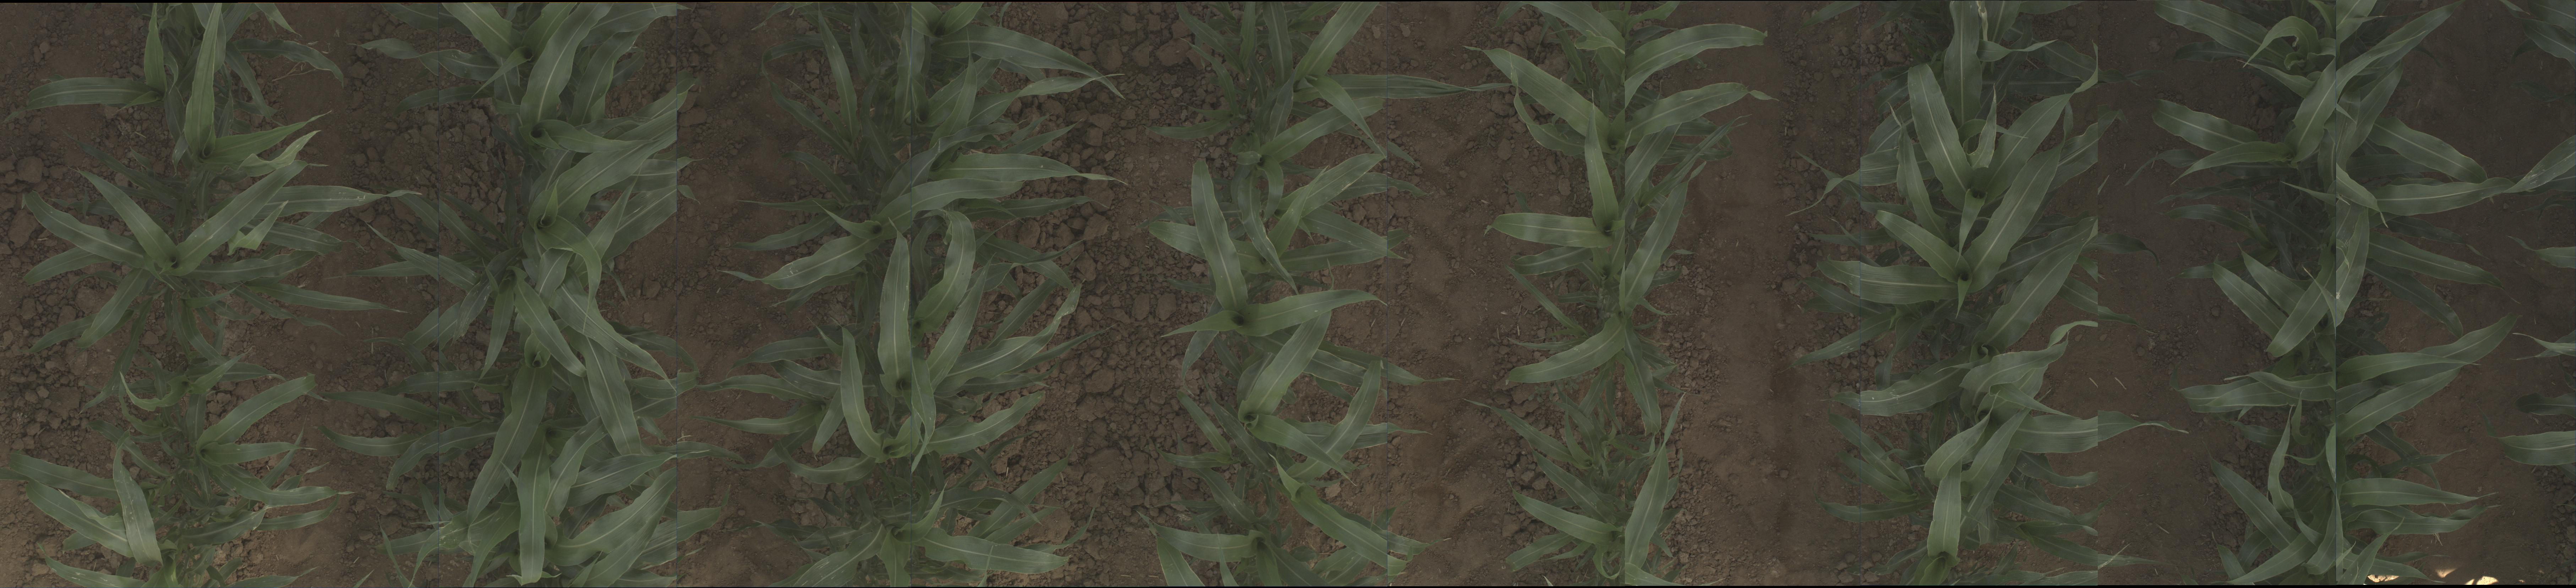

In [9]:
Image("small_head.jpg") 

## Running on HPC

The above example demonstrates how to stitch 10 images in a constrained Jupyter environment. A single day of TERRA-REF stereo RGB data contains over 8,000 images.  What if we want to stitch the full field image for a week or a month?

The TERRA-REF data is available on the ROGER HPC system at NCSA. The following example demonstrates how to use the Agave API from Jupyter to launch a batch processing job on ROGER.

In [2]:
agave_username="<username>"
agave_password="<password>"

agave_password = getpass.getpass()

In [ ]:
agave_username = raw_input()

In [ ]:
#!~/work/agave-cli/bin/tenants-init --tenant 3

In [ ]:
#!~/work/agave-cli/bin/auth-tokens-create -S  -u "$agave_username" -p "$agave_password"

In [4]:
!~/work/agave-cli/bin/jobs-submit -F ../agave/example-job.json

Successfully submitted job 841946215468756505-242ac113-0001-007


In [8]:
! ~/work/agave-cli/bin/jobs-history 761740009593115111-242ac113-0001-007

Job accepted and queued for submission.
Skipping staging. No input data associated with this job.
Preparing job for submission.
Attempt 1 to submit job
Fetching app assets from agave://willis8.roger-storage.ncsa//home/willis8/agave-apps/stitching-demo
Staging runtime assets to agave://willis8.roger.ncsa//gpfs/largeblockFS/projects/arpae/terraref/users/willis8/agave/willis8/job-761740009593115111-242ac113-0001-007-stitch-8
HPC job successfully placed into batch queue as local job 78274.cg-gpu01
Job started running
Job completed execution
Job completed. Skipping archiving at user request.


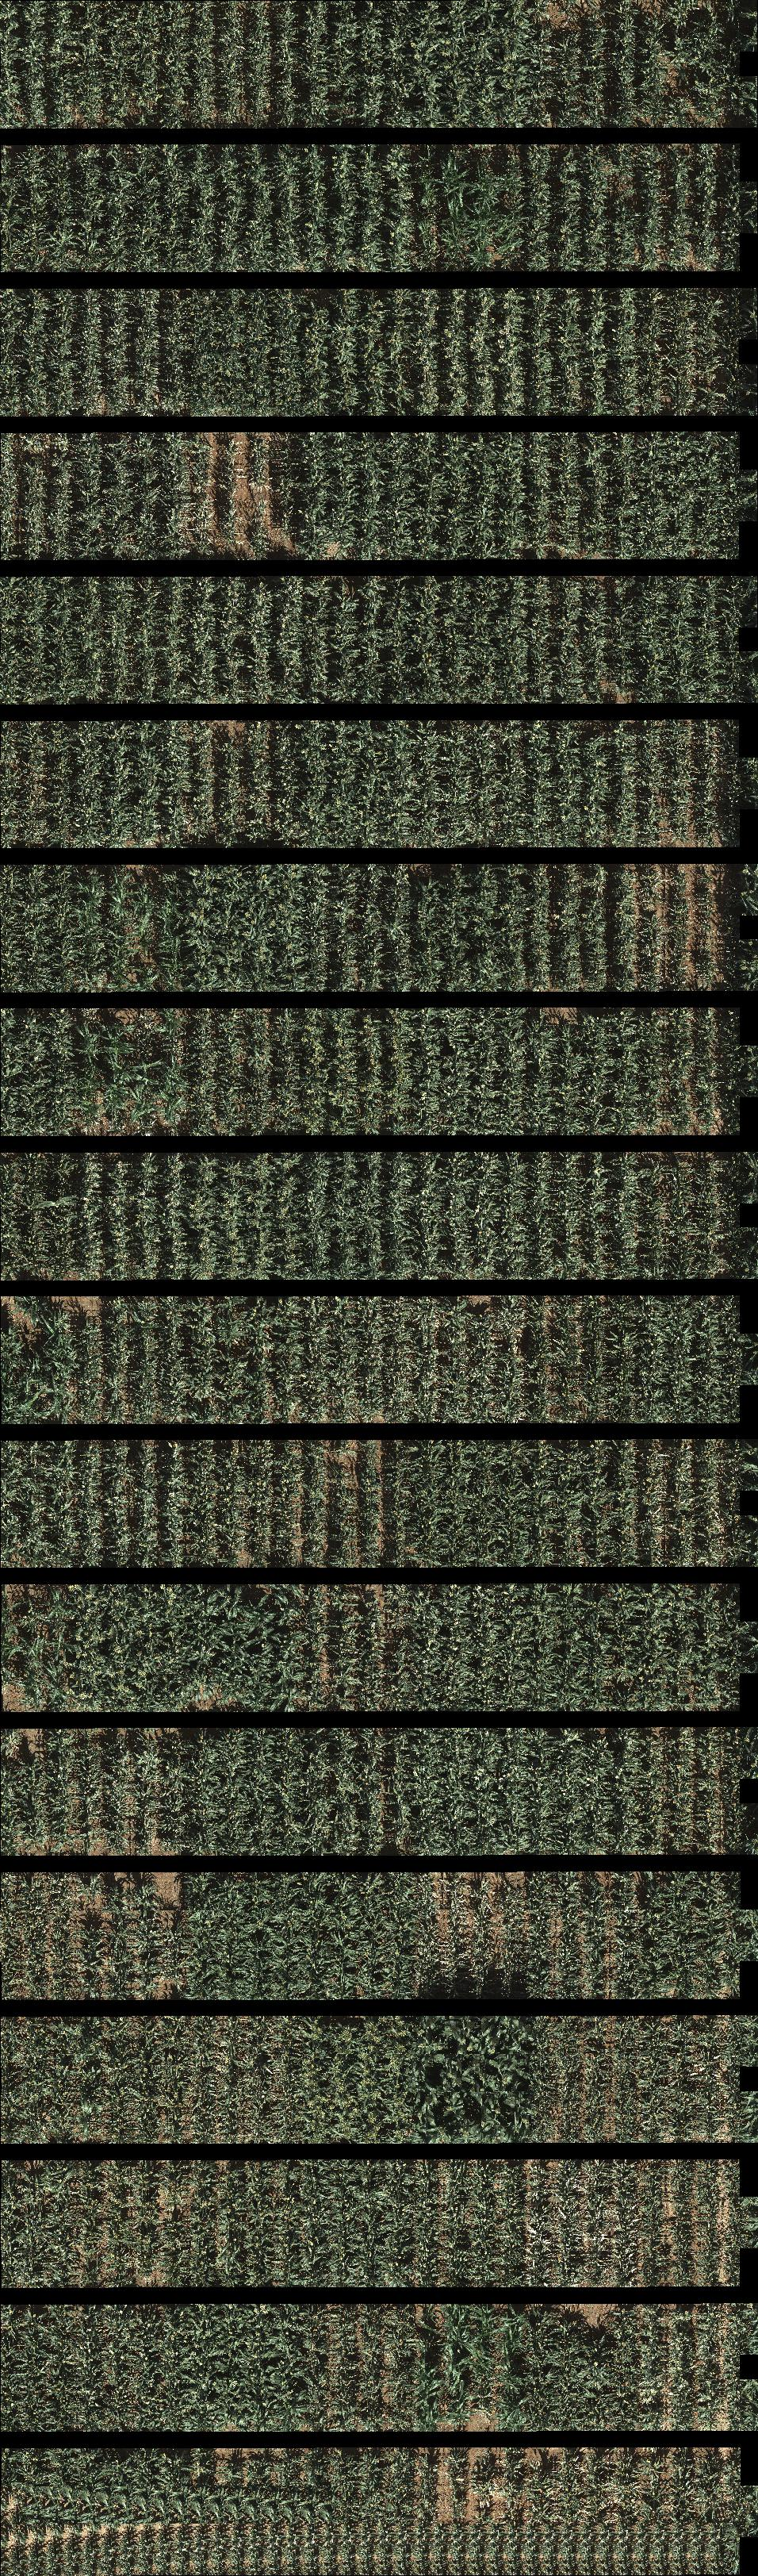

In [7]:
Image("/data/terraref/users/willis8/stitch/2016-10-25/stitch.jpg") 

## Running via Singularity Container

The ROGER HPC integration requires all application dependencies to be installed and available on the HPC system.  What if our application uses libraries that aren't available on the host HPC? 

This example demonstrates launching the same job on the SDSC Comet system using Singularity.